# mRNA RPKM drawing

In [1]:
# coding:utf-8 #
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
#-*-coding:utf-8-*-
#文件名: ch.py
# cp from https://my.oschina.net/u/1180306/blog/279818
def set_ch():
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
# turn it ON or OFF here
mac = 0

data = ''
if mac:
    data = pd.DataFrame.from_csv('RPKM/abundance/12sample.1e-8.species.mRNAabundance', sep='\t')
else:
    data = pd.DataFrame.from_csv('C:/Users/pengye/desktop/4ploting/rRNA/RPKM/12sample.1e-8.species.mRNAabundance', sep='\t')

In [4]:
trimed_data = data.drop(data.columns[4:8], axis=1, inplace=False)

In [5]:
# smpl_name = ['JJ-C', 'JJ-1', 'JJ-2', 'JJ-3', 'FC-C', 'FC-1', 'FC-2', 'FC-3', 'PY-C', 'PY-1', 'PY-2', 'PY-3']
smpl_name = ['S1-C', 'S1-1', 'S1-2', 'S1-3', 'S2-C', 'S2-1', 'S2-2', 'S2-3', 'S3-C', 'S3-1', 'S3-2', 'S3-3']

trimed_data.columns = smpl_name

In [6]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.minorticks_off()
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
def setTicks(ax):
    plt.setp(ax,
             xticks=np.logspace(-2, 6, num=9),
             xticklabels=range(-2, 7),
             yticks=np.logspace(-2, 6, num=9),
             yticklabels=range(-2, 7))
    ax.tick_params(axis='both', which='major', labelsize=25)

def pearsonText(ax, cor):
    ax.text(0.215, 0.95,
            'Pearson\'s r: %.3f' % cor,
            ha='center', va='center',
            transform=ax.transAxes,
            bbox={'facecolor':'gainsboro', 'alpha':0.2, 'pad':10},
            fontsize=27)

#def 

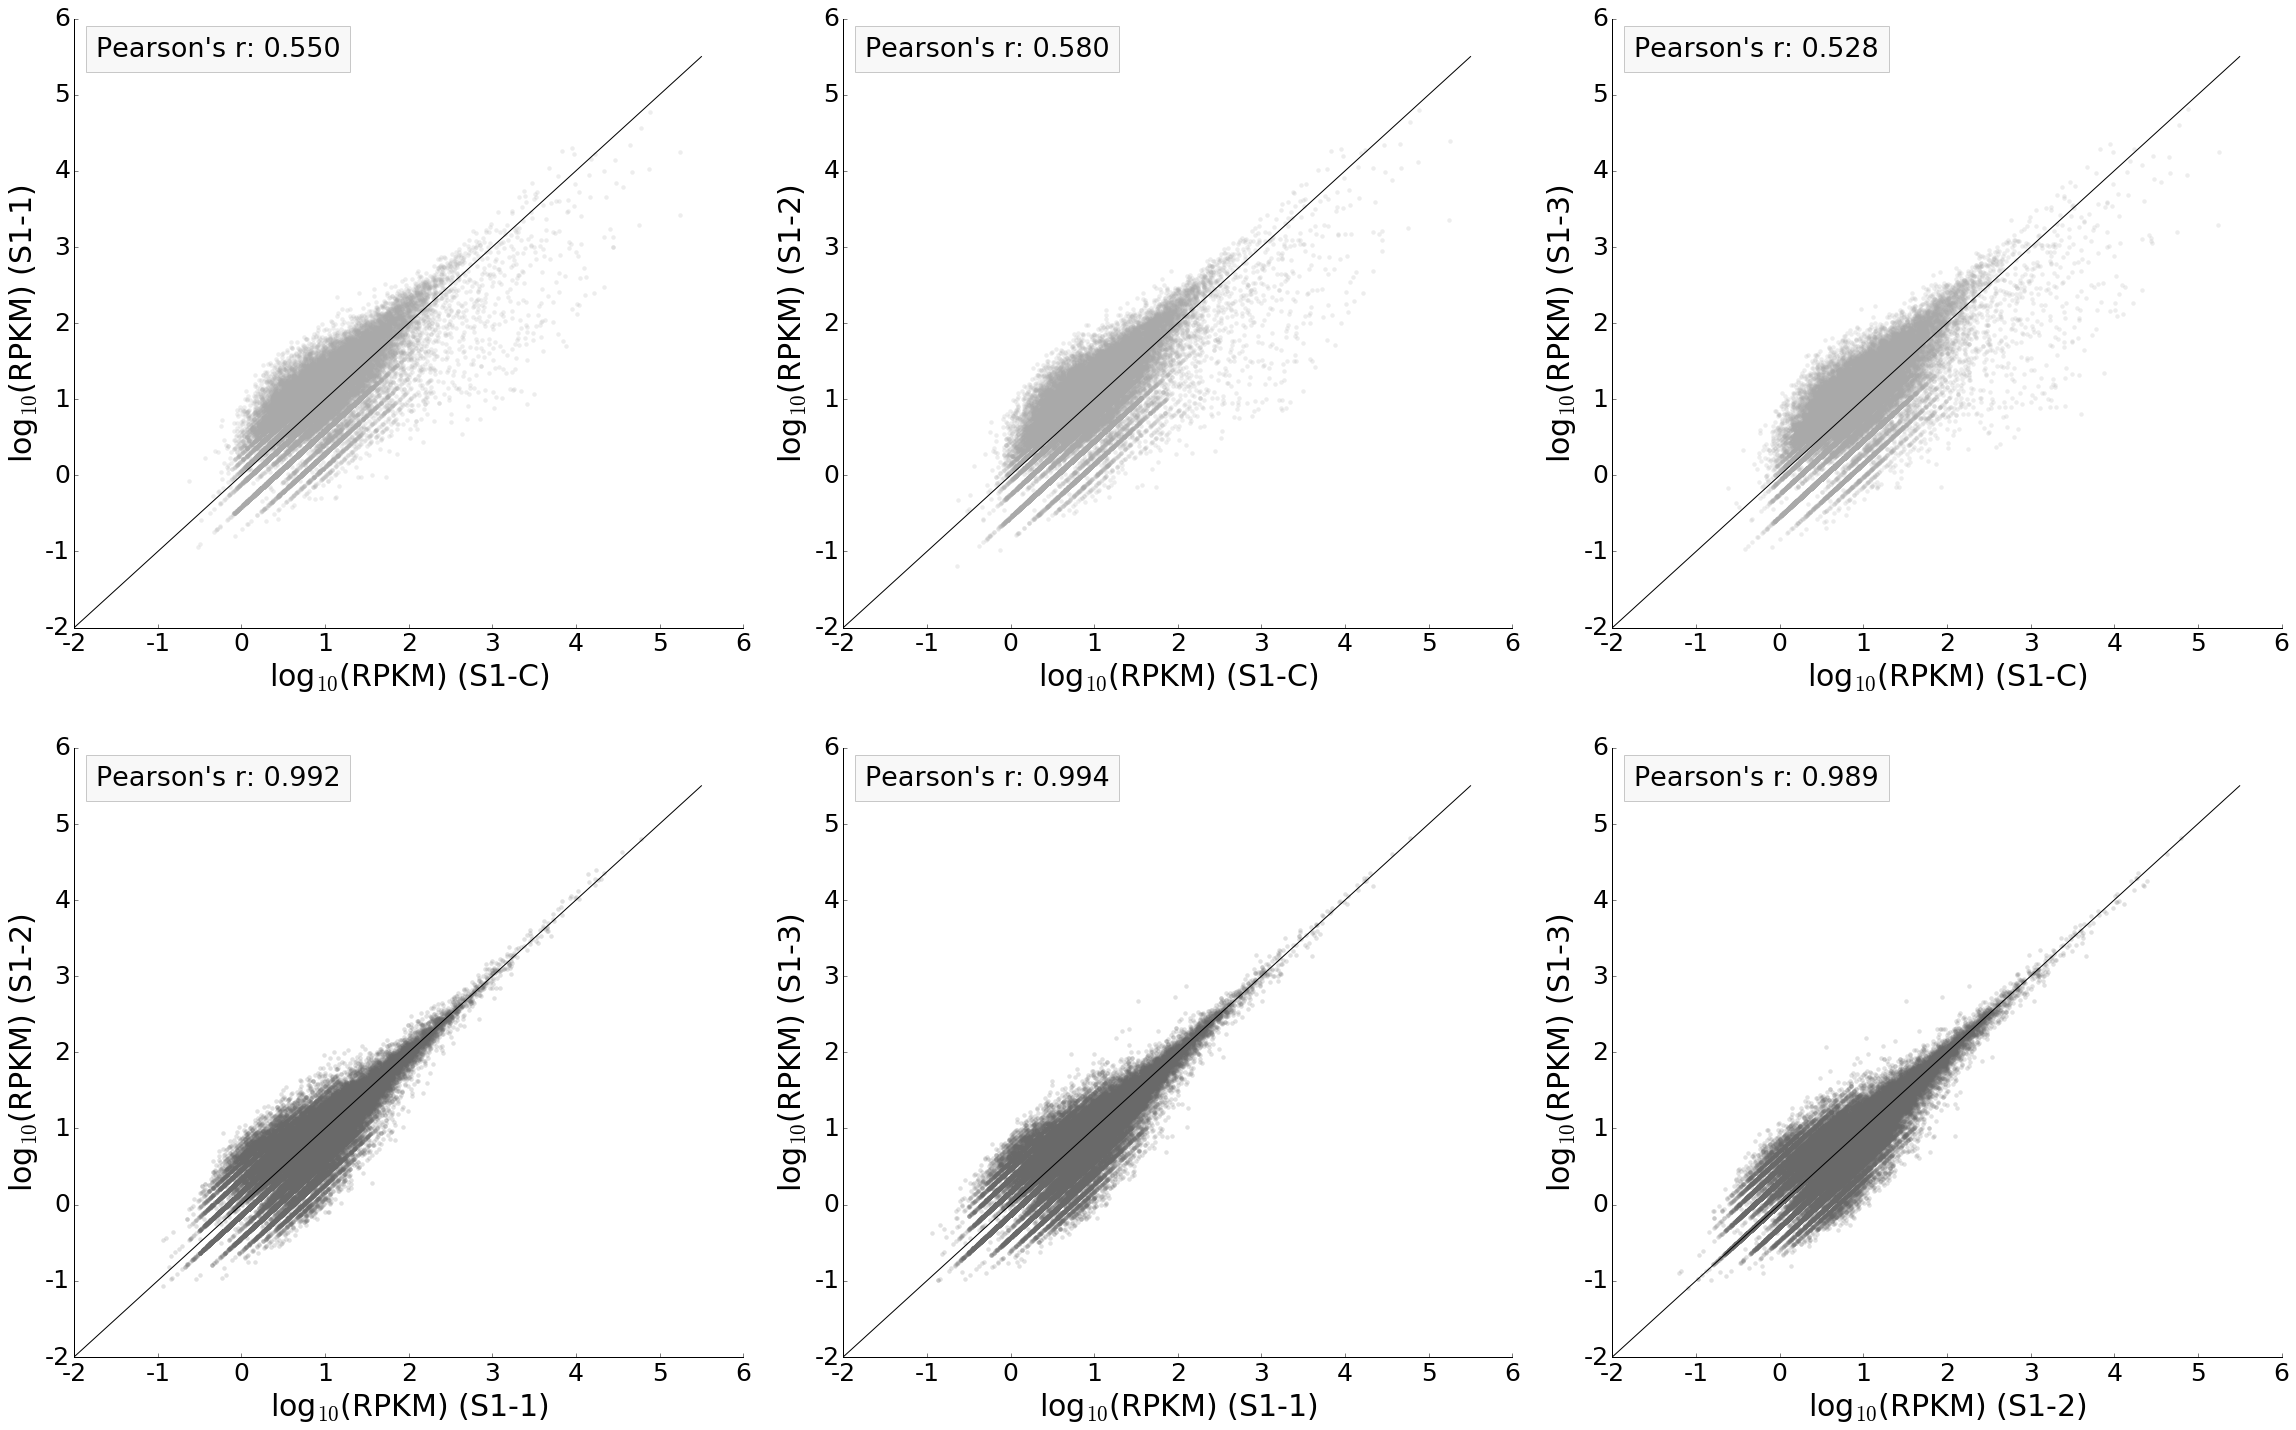

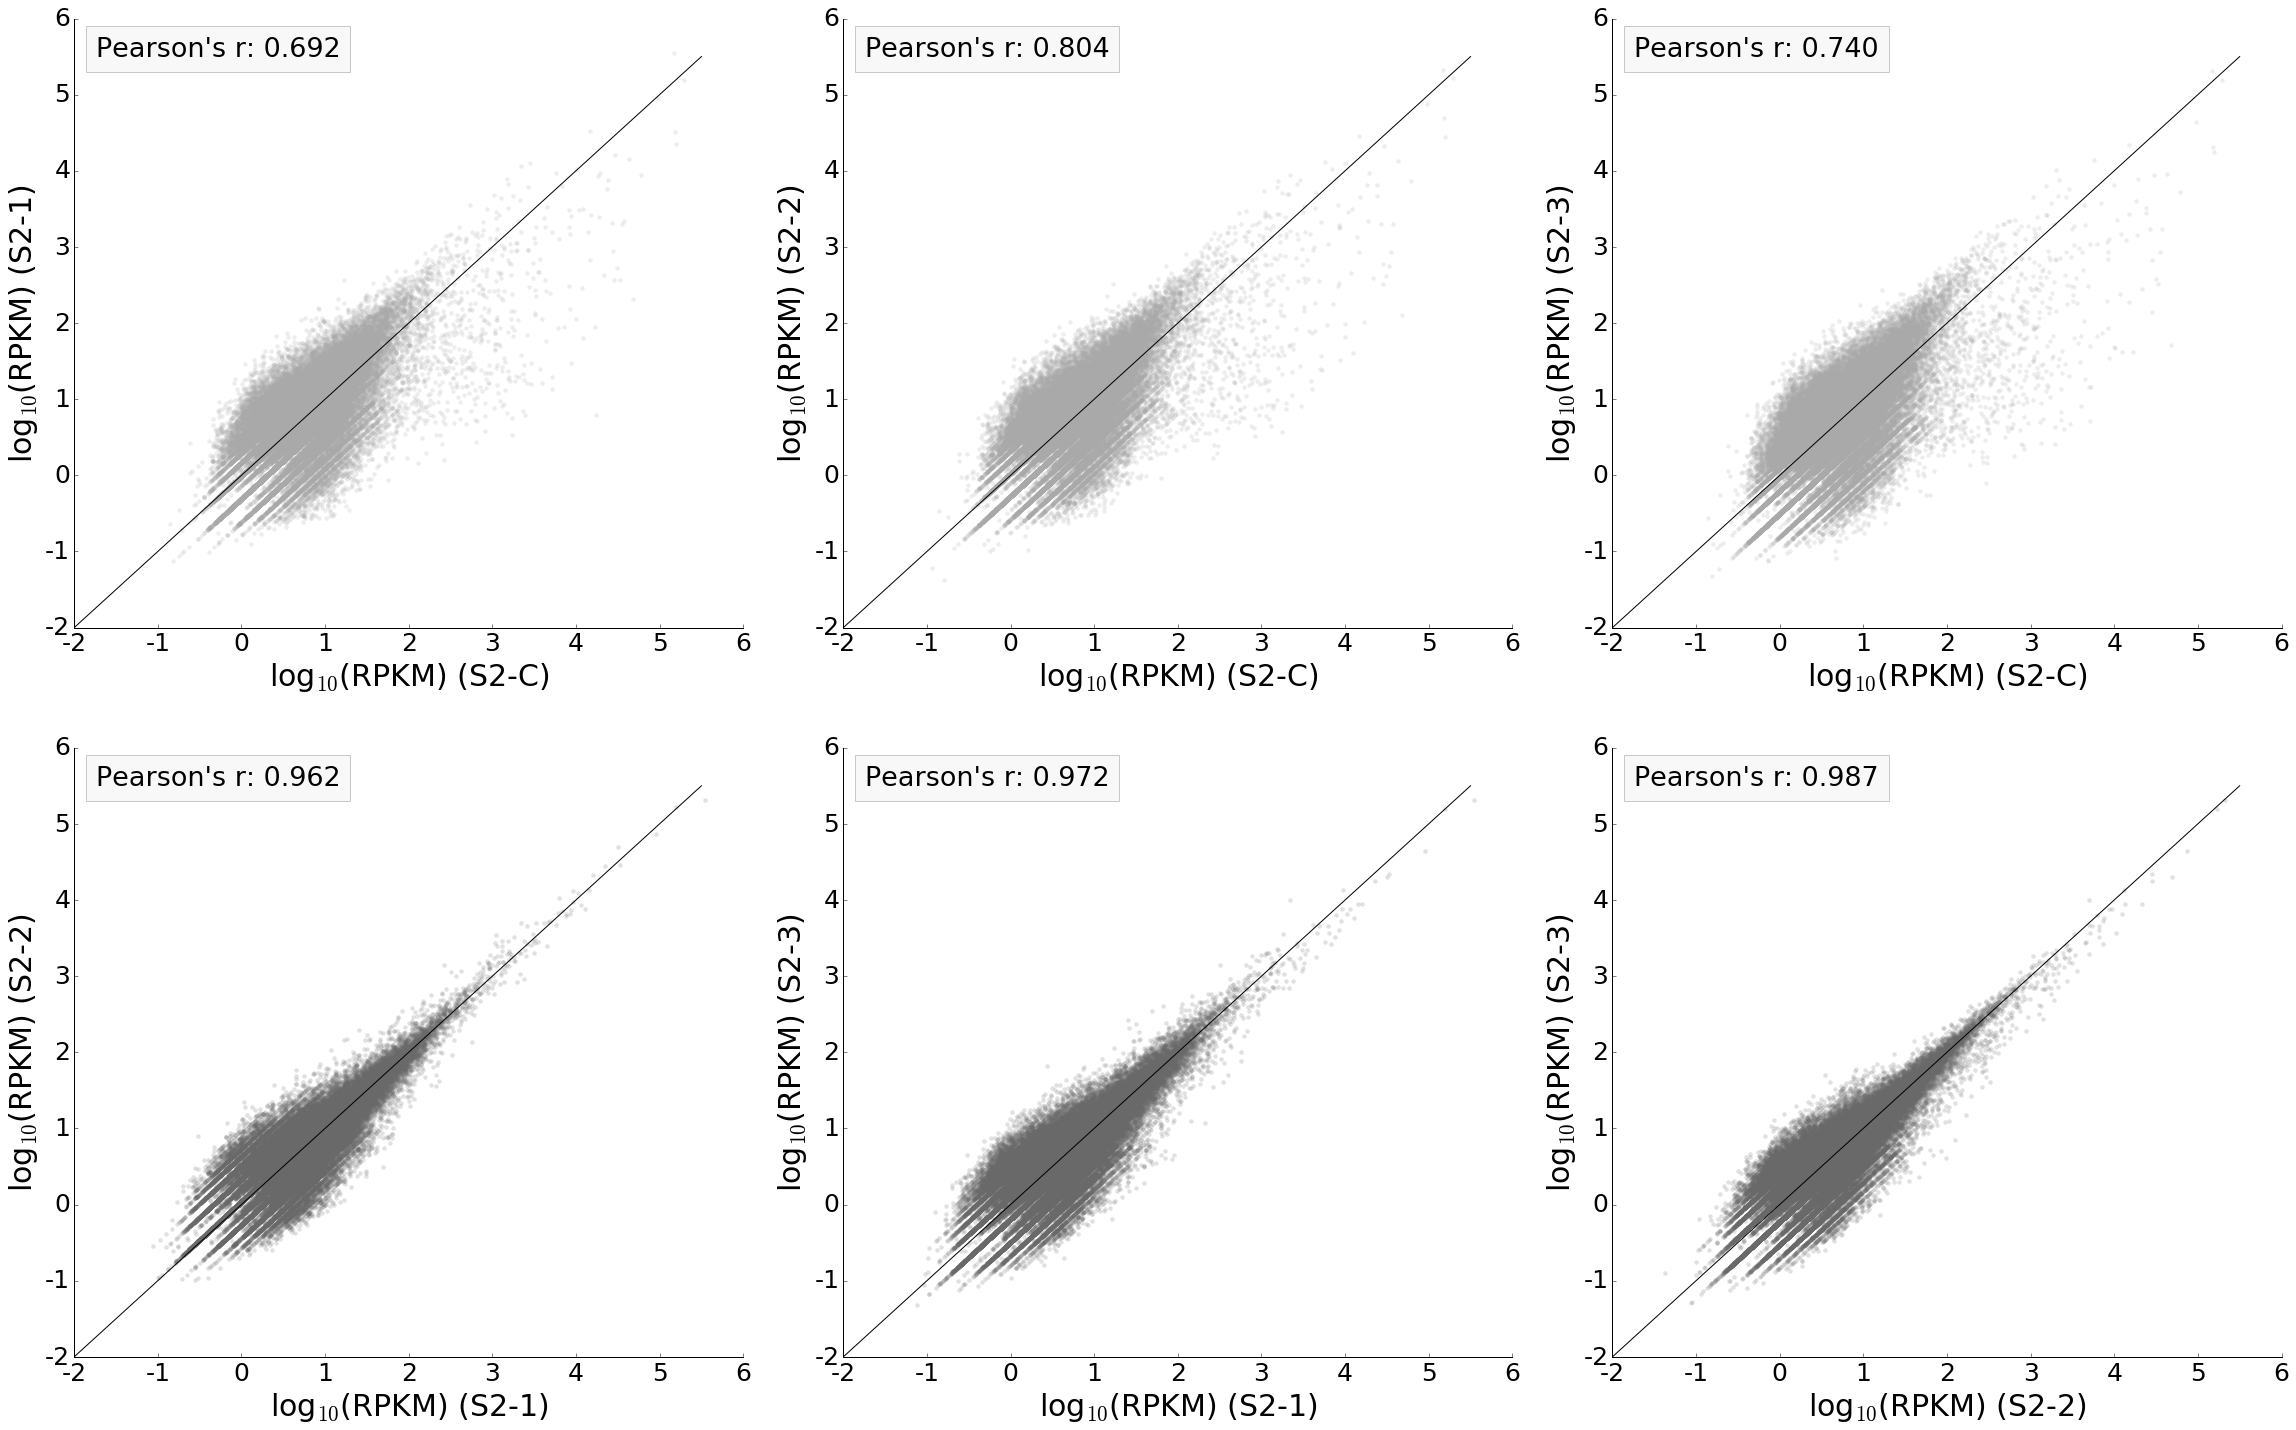

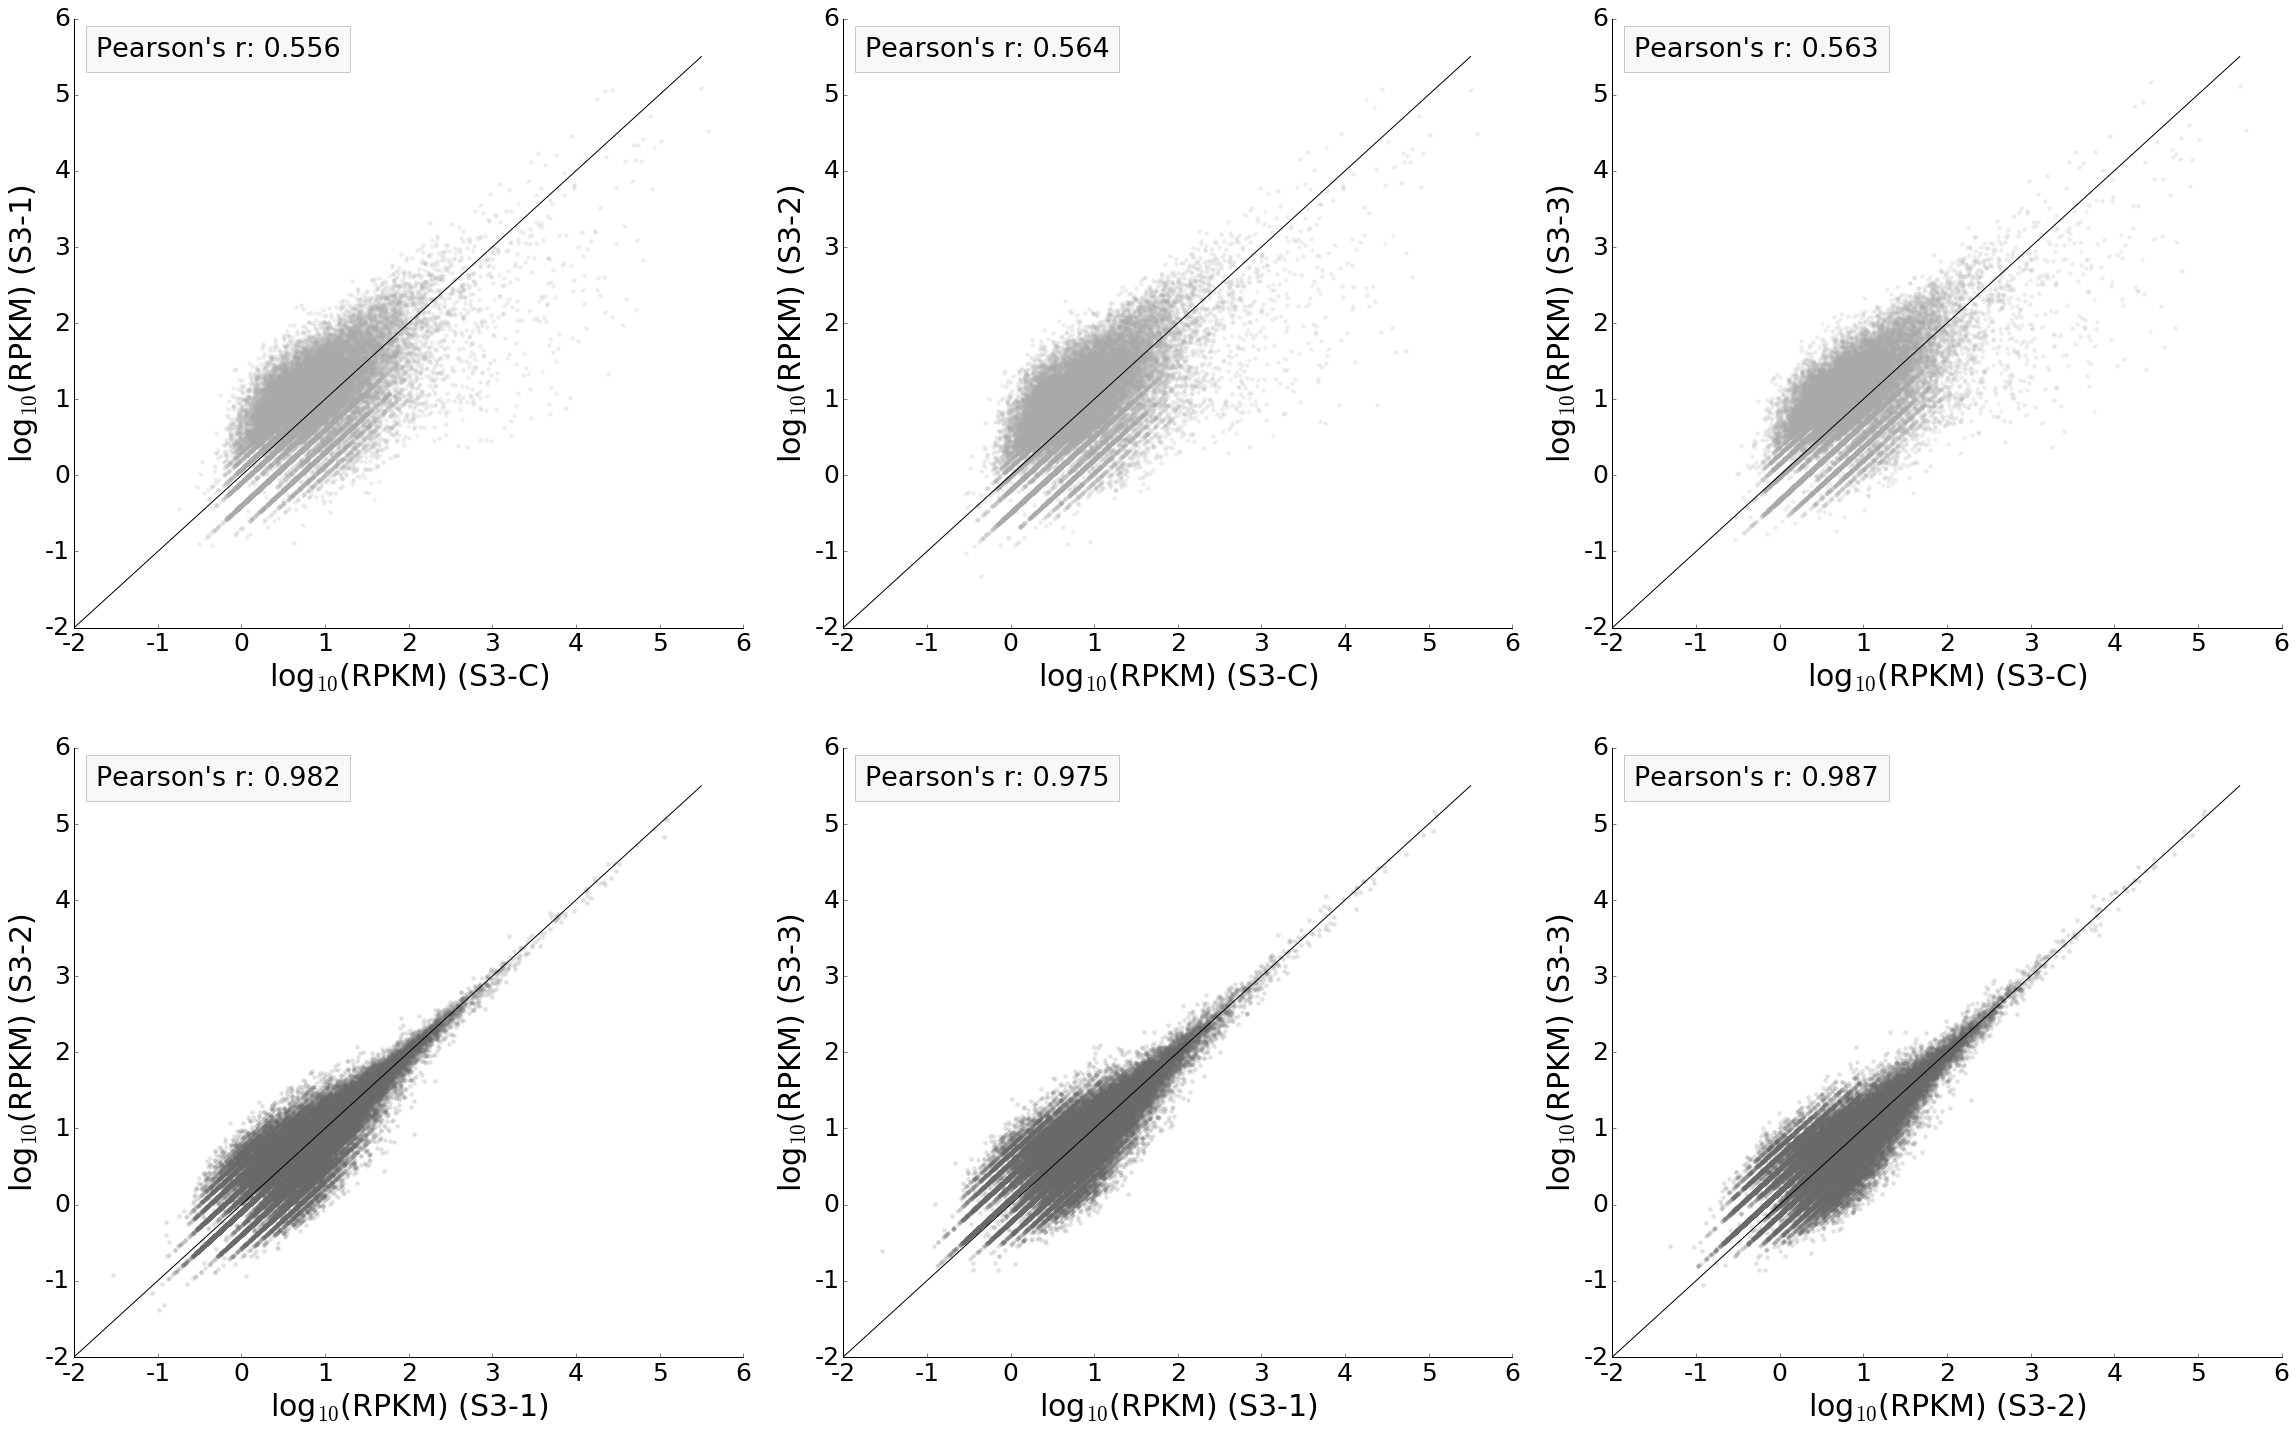

In [7]:
%matplotlib inline

def drawRPKM(smpl):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(32, 20))
    fig.patch.set_facecolor('white')
    for i in range(1, 4):
        base = smpl
        j = i + base
        x = trimed_data.ix[:, base]
        y = trimed_data.ix[:, j]
        ax = axes[0, i-1]
    
        cor = x.corr(y)    
        pearsonText(ax, cor)

        ax.scatter(x, y, alpha=.2, c='darkgray', linewidth=0.0)

        # ax.set_title('%s vs %s' % (smpl_name[j], smpl_name[base]), fontsize=35)
        ax.set_xlabel('log$_{10}$(RPKM) (%s)' % smpl_name[base], fontsize=30)   # use {} to include '1' and '0' as a whole
        ax.set_ylabel('log$_{10}$(RPKM) (%s)' % smpl_name[j], fontsize=30)

        ax.set_xlim((1e-2, 1e6))
        ax.set_ylim((1e-2, 1e6))

        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.plot((1e-2, 10**5.5), (1e-2, 10**5.5), c='k')

        setTicks(ax)
        simpleaxis(ax)

    for m, pair in enumerate(zip([1, 1, 2], [2, 3, 3])):
        base = smpl
        xloc = pair[0] + base
        yloc = pair[1] + base
        x = trimed_data.ix[:, xloc]
        y = trimed_data.ix[:, yloc]
        ax = axes[1, m]

        cor = x.corr(y)
        pearsonText(ax, cor)

        ax.scatter(x, y, alpha=.2, c='dimgray', linewidth=0.0)

        # ax.set_title('%s vs %s' % (smpl_name[yloc], smpl_name[xloc]), fontsize=35)
        ax.set_xlabel('log$_{10}$(RPKM) (%s)' % smpl_name[xloc], fontsize=30)
        ax.set_ylabel('log$_{10}$(RPKM) (%s)' % smpl_name[yloc], fontsize=30)

        ax.set_xlim((1e-2, 1e6))
        ax.set_ylim((1e-2, 1e6))

        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.plot((1e-2, 10**5.5), (1e-2, 10**5.5), c='k')

        setTicks(ax)
        simpleaxis(ax)

    plt.tight_layout(w_pad=2.5, h_pad=4.0)
    plt.show()
    
smpls = [0, 4, 8]
for sp in smpls:
    drawRPKM(sp)

# Species average soap depth drawing

In [10]:
import os, fnmatch

In [11]:
# cp from http://stackoverflow.com/questions/1724693/find-a-file-in-python
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [12]:
files_path = ''
all_files = []
if mac:
    files_path = r'./10bacteria_depth_R'
    all_files = find('*', files_path)
else:
    files_path = r'C:\Users\pengye\Desktop\4ploting\rRNA\rRNA_soap\species_depth'
    all_files = find('*', files_path) # actually these files are the same as those in modified_files

In [13]:
# the logic of grouping here differs from that one in rRNA soap drawing
list_of_16s_files = [x for x in all_files if '16S' in x]
list_of_23s_files = [x for x in all_files if '23S' in x]

In [14]:
spec_name = [os.path.basename(x).split('.')[0] for x in list_of_16s_files]
spec_name = list(set(spec_name)) # generate non-redundant name list

In [15]:
def groupFiles(file_list, name_list):
    file_groupby_spec = pd.DataFrame()
    for spec in name_list:
        tmp_file_list = []
        for file_name in file_list:
            if spec in file_name:
                tmp_file_list.append(file_name)
        file_groupby_spec[spec] = tmp_file_list
    return file_groupby_spec

In [16]:
def getStat(file_, func=np.mean, sep=' ', axis=0, header=None):
    df = pd.DataFrame.from_csv(file_, sep=sep, header=header).T
    func_result = df.apply(func, axis=axis)
    return func_result[0]

print getStat(list_of_16s_files[0])

# testify the getStat function
with open(list_of_16s_files[0]) as test_f:
    line = test_f.readlines()
    line = line[0].split(' ')[1:]
    line = [float(x) for x in line]
    print sum(line)/float(len(line))

2568.39493819
2568.39493819


In [17]:
def fileToStat(file_df, func=np.mean):
    """
    dependent to getStat
    """
    stat_df = pd.DataFrame()
    for col in file_df.columns:
        tmp_list = map(getStat, file_df[col])
        stat_df[col] = tmp_list
        # print ' '.join([os.path.basename(x).split('.')[1] for x in file_df[col]])
    idx = [os.path.basename(x).split('.')[1] for x in file_df.ix[:, 0]]
    # print idx
    stat_df.index = idx
    return stat_df

In [18]:
full_smpl_indx = ['S1', 'S1', 'S1', 'S1', 'S_drop', 'S_drop', 'S_drop', 'S_drop', 'S2', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3', 'S3']
full_type_indx = [x for i in range(4) for x in ['C', '1', '2', '3']] # [x for x in ['C', '1', '2', '3'] for i in range(4)] results in ['C', 'C', 'C', 'C', '1', ... , '3']
full_smpl_type = ['%s-%s' % (x, y) for x, y in zip(full_smpl_indx, full_type_indx)]

def addMultiindex(df):
    df.index = [full_smpl_indx, full_type_indx, df.index]

In [19]:
file_groupby_spec_16s = groupFiles(list_of_16s_files, spec_name)
mean_groupby_spec_16s = fileToStat(file_groupby_spec_16s)

file_groupby_spec_23s = groupFiles(list_of_23s_files, spec_name)
mean_groupby_spec_23s = fileToStat(file_groupby_spec_23s)

In [20]:
#
control_list_16s = ['16S_09', '16S_13', '16S_33', '16S_37']
tmp_df = mean_groupby_spec_16s.T[control_list_16s]
sorted_columns = pd.DataFrame(tmp_df.mean(1)).sort_values(by=0, ascending=False).index
sorted_columns

mean_groupby_spec_16s = mean_groupby_spec_16s[sorted_columns]
mean_groupby_spec_23s = mean_groupby_spec_23s[sorted_columns]

In [21]:
addMultiindex(mean_groupby_spec_16s)
addMultiindex(mean_groupby_spec_23s)

In [22]:
cmap = [x for i in range(4) for x in ['dimgray', 'lightgrey', 'lightgrey', 'lightgrey']]

In [23]:
from matplotlib.patches import Rectangle

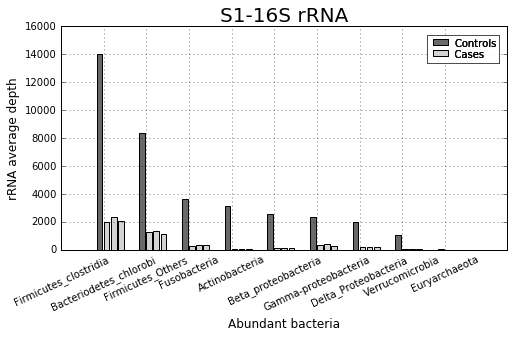

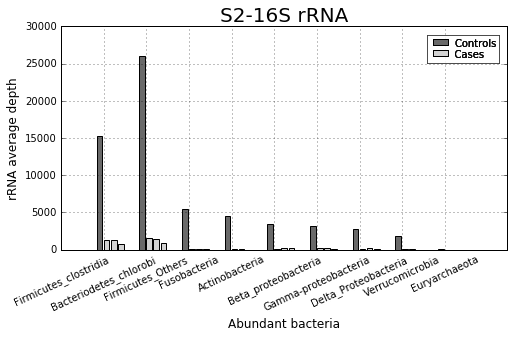

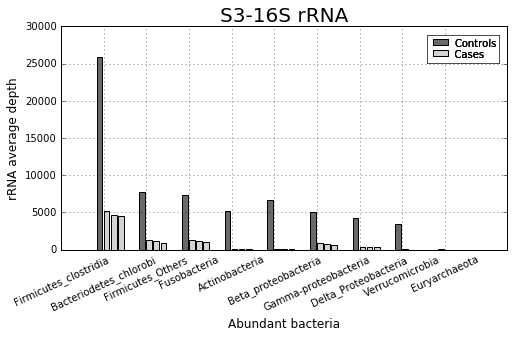

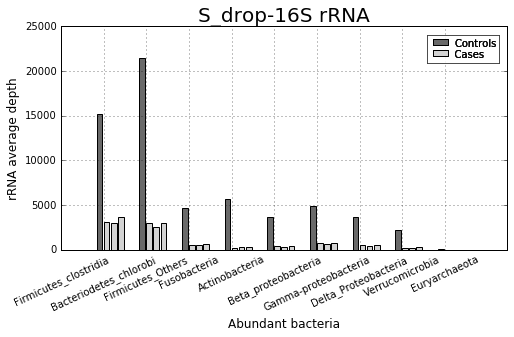

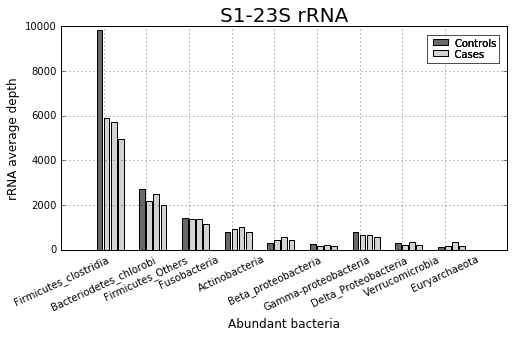

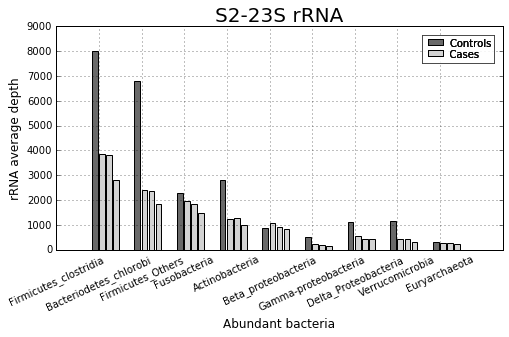

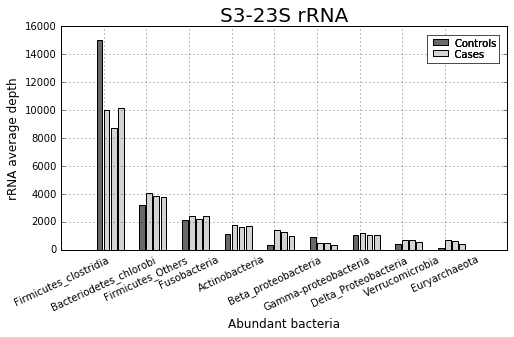

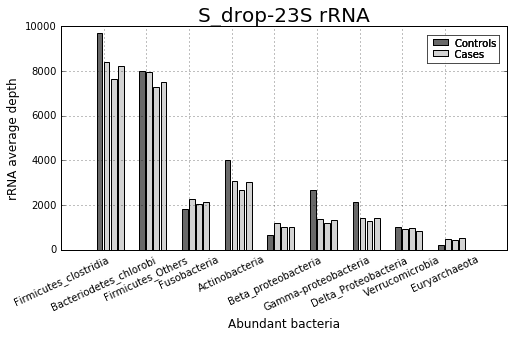

In [25]:
%matplotlib inline

# set_ch()

# mean_groupby_spec_16s.Verrucomicrobia.plot.barh()
def plotBar(df, tag): # with multiindex
    rRNA_type = tag
    for smpl_idx in df.index.levels[0]:
        fig, ax = plt.subplots(figsize=(8, 4))
        fig.patch.set_facecolor('white')
        n = 0
        all_loc = []
        for col in df.columns:
            single_loc = [x+n for x in range(4)]
            all_loc.append(n-5)
            
            ax.set_title('%s-%sS rRNA' % (smpl_idx, rRNA_type), fontsize=20)
            
            barPlot = ax.bar(single_loc, df.ix[smpl_idx][col], color=cmap)
            
            # plt.legend(['Controls', 'Cases'])            
            ax.add_patch(Rectangle((.833, .916), .033, .028, facecolor="dimgray", zorder=6, transform=ax.transAxes)) # set zorder=6 to make sure it is drawed on the top
            ax.add_patch(Rectangle((.833, .867), .033, .028, facecolor="lightgrey", zorder=6, transform=ax.transAxes))
            
            ax.text(0.9, 0.9,
            '        Controls\n    Cases',
            ha='center', va='center',
            transform=ax.transAxes,
            bbox={'facecolor':'white', 'alpha':0.2, 'pad':3},
            fontsize=10)
            
            ax.set_xlabel(u'Abundant bacteria', fontsize=12)
            ax.set_ylabel(u'rRNA average depth', fontsize=12)
            plt.xticks(all_loc, df.columns, rotation=25)
            plt.tick_params(
                axis='x',
                which='both',
                top='off',
                length=0)
            
            plt.grid('on')
            n += 6
        plt.show()

plotBar(mean_groupby_spec_16s, 16)
plotBar(mean_groupby_spec_23s, 23)

# rRNA soap details drawing

In [13]:
# cp from http://stackoverflow.com/questions/1724693/find-a-file-in-python
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [26]:
files_path = ''
all_files = []
modified_files = []
if mac:
    files_path = r'./10bacteria_depth_R'
    modified_files = find('*', files_path)
else:
    files_path = r'C:\Users\pengye\Desktop\4ploting\rRNA\rRNA_soap\soap_details'
    all_files = find('*', files_path)

In [27]:
no_depth = [x for x in all_files if 'depth' not in x and 'soapout.list' not in x]
tmp_files = [x for x in no_depth if 'temp' in x]

# just don't wanna use SET, stupid? let it be.
modify_and_raw_files = [x for x in no_depth if x not in tmp_files]
modified_files = [x for x in modify_and_raw_files if 'modify' in x]
raw_files = [x for x in modify_and_raw_files if x not in modified_files]

def makeDF(file_list):
    whole_df = pd.DataFrame()
    for file_ in file_list:
        name = '_'.join(os.path.basename(file_).split('.')[:-2])
        
        with open(file_) as f:
            each_list = []
            tmp_list = [x.strip() for x in f.readlines()]

            for line in tmp_list:
                line = line.split(' ')
                if '>' in line[0]:
                    line = line[1:]
                line = [float(x) for x in line]
                each_list.extend(line)
        
        whole_df[name] = each_list
    
    return whole_df

In [495]:
## test for Firmicutes_Others
## no need for running this cell

# raw
f_o_16s_files = [x for x in raw_files if 'Firmicutes_Others' in x and '16S' in x]
s1_f_o_16s_files = [x for x in f_o_16s_files if x.split(r'/')[-1].split('.')[1].split('_')[-1] in ['9', '10', '11', '12']]
s1_f_o_16s_df = makeDF(s1_f_o_16s_files)
# s1_f_o_16s_df.plot()

# tmp
f_o_16s_files = [x for x in tmp_files if 'Firmicutes_Others' in x and '16S' in x]
s1_f_o_16s_files = [x for x in f_o_16s_files if x.split(r'/')[-1].split('.')[1].split('_')[-1] in ['09', '10', '11', '12']]
s1_f_o_16s_df = makeDF(s1_f_o_16s_files)
# s1_f_o_16s_df.plot()

# modified
f_o_16s_files = [x for x in modified_files if 'Firmicutes_Others' in x and '16S' in x]
s1_f_o_16s_files = [x for x in f_o_16s_files if x.split(r'/')[-1].split('.')[1].split('_')[-1] in ['09', '10', '11', '12']]
s1_f_o_16s_df = makeDF(s1_f_o_16s_files)
# s1_f_o_16s_df.plot()

In [116]:
def calculateSize(df, group_bin=4):
    all_loc = []
    n = 0
    rounds = len(df.columns)/4
    for i in range(rounds):
        loc = [x+n for x in range(group_bin)]
        all_loc.append(loc)
        n += group_bin
    return rounds, all_loc
    
def getDF(b_df, s_loc):
    return b_df.ix[:, s_loc], b_df.columns[s_loc]

def drawDepth(df, ax, title):
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Position', fontsize=12)
    ax.set_ylabel('Sequencing depth', fontsize=12)    
    
    linestyle=['--', '-', '-', '-']
    linewidth=[1.25, 1, 1, 1]
    color=['k', 'grey', 'grey', 'grey']
    for i, style_width_color in enumerate(zip(linestyle, linewidth, color)):
        linestyle, linewidth, color = style_width_color
        ax.plot(df.ix[:, i], linestyle=linestyle, linewidth=linewidth, color=color)
        
    # plt.legend(['Controls', 'Cases'])            
    ax.plot((.115, .15), (.955, .955), color="k", linestyle='--', linewidth=1.3, transform=ax.transAxes)
    ax.plot((.115, .15), (.91, .91), color="grey", linestyle='-', linewidth=1.3, transform=ax.transAxes)

    ax.text(0.08, 0.93,
            'Controls     \nCases         ',
            ha='center', va='center',
            transform=ax.transAxes,
            bbox={'facecolor':'white', 'alpha':0.2, 'pad':3},
            fontsize=12)

def mainDraw(df, axes, col, title=None):
    col = col
    rounds, locs = calculateSize(df)
    for row, loc in enumerate(locs):
        tmp_df, names = getDF(df, loc)
        name = names[0].split('-')[0]
        long_title = '%s rRNA in %s' % (title, name)
        drawDepth(tmp_df, axes[row, col], long_title)

In [122]:
short_list = ['S1-C', 'S1-1', 'S1-2', 'S1-3', 'S2-C', 'S2-1', 'S2-2', 'S2-3', 'S3-C', 'S3-1', 'S3-2', 'S3-3']

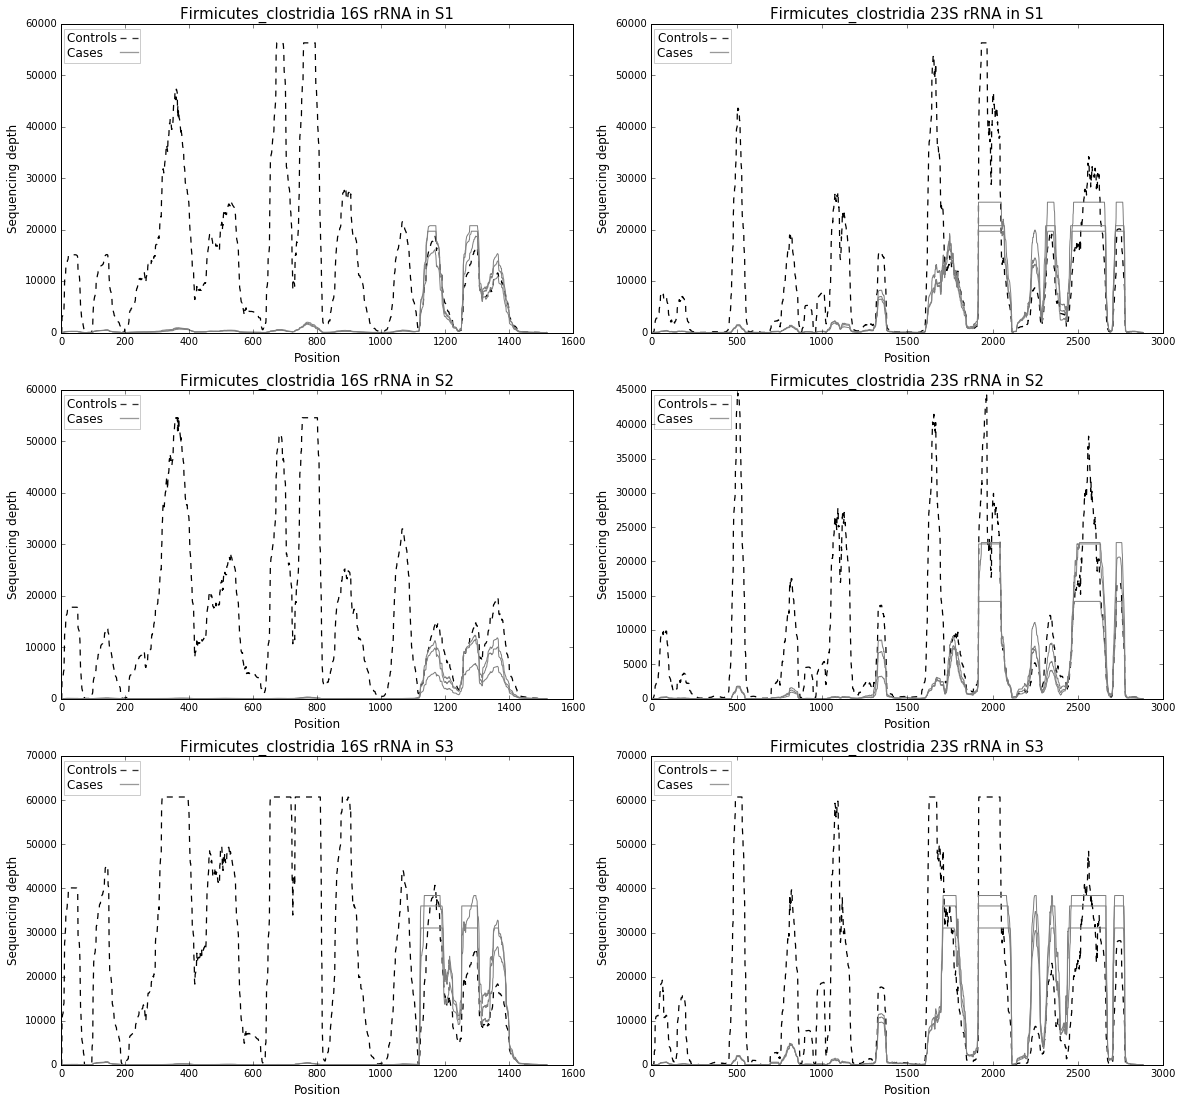

In [124]:
## F_C detail frawing
%matplotlib inline
f_c_16s_files = [x for x in modified_files if 'Firmicutes_c' in x and '16S' in x]
f_c_23s_files = [x for x in modified_files if 'Firmicutes_c' in x and '23S' in x]


f_c_16s_df = makeDF(f_c_16s_files)
f_c_16s_df.columns = full_smpl_type
f_c_16s_df = f_c_16s_df[short_list]

f_c_23s_df = makeDF(f_c_23s_files)
f_c_23s_df.columns = full_smpl_type
f_c_23s_df = f_c_23s_df[short_list]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))
fig.patch.set_facecolor('white')
plt.tight_layout(w_pad=5, h_pad=4)
mainDraw(f_c_16s_df, axes, 0, title='Firmicutes_clostridia 16S')
mainDraw(f_c_23s_df, axes, 1, title='Firmicutes_clostridia 23S')

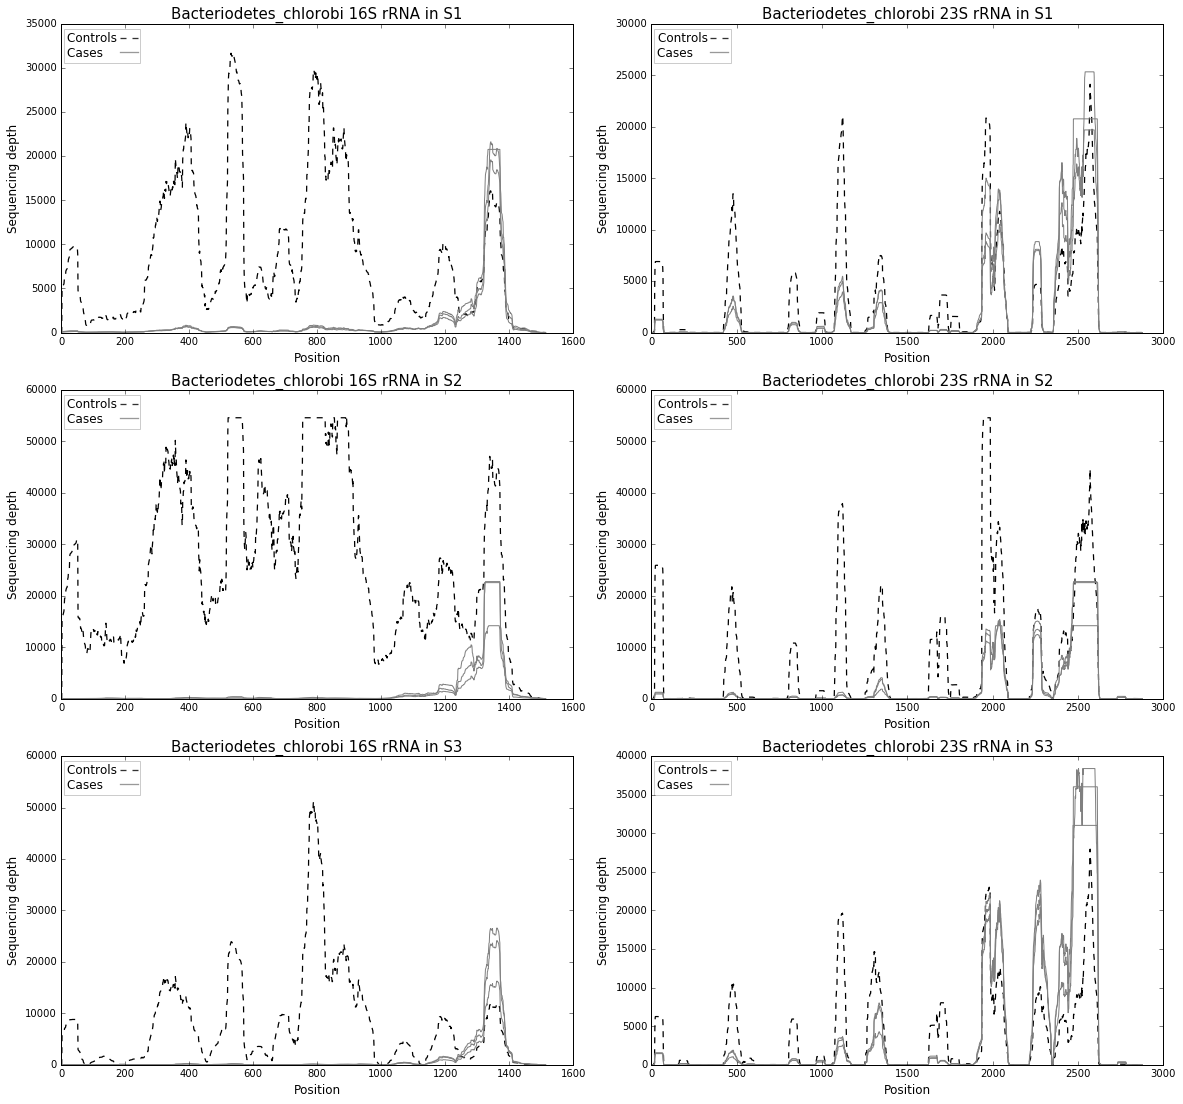

In [125]:
## B_C detail frawing
%matplotlib inline
b_c_16s_files = [x for x in modified_files if 'Bacteriodetes_chlorobi' in x and '16S' in x]
b_c_23s_files = [x for x in modified_files if 'Bacteriodetes_chlorobi' in x and '23S' in x]

b_c_16s_df = makeDF(b_c_16s_files)
b_c_16s_df.columns = full_smpl_type
b_c_16s_df = b_c_16s_df[short_list]

b_c_23s_df = makeDF(b_c_23s_files)
b_c_23s_df.columns = full_smpl_type
b_c_23s_df = b_c_23s_df[short_list]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))
fig.patch.set_facecolor('white')
plt.tight_layout(w_pad=5, h_pad=4.0)
mainDraw(b_c_16s_df, axes, 0, title='Bacteriodetes_chlorobi 16S')
mainDraw(b_c_23s_df, axes, 1, title='Bacteriodetes_chlorobi 23S')

In [535]:
# f_c_16s_files